In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from retrieveData import DataHandler
import scipy.stats as stats

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


file_path = '/Users/davidboktor/Documents/Tiingo_API.txt'
handler = DataHandler(file_path)


test = handler.test_connections()


Connection successful: {'message': 'You successfully sent a request'}


In [19]:
def plot_distribution(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    ax1.hist(data, bins=50, density=True, alpha=0.7)
    ax1.set_title(f"{title} - Histogram")
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f"{title} - Q-Q Plot")
    
    plt.tight_layout()
    plt.show()


# Function to test normality
def is_normal(sample, test=stats.shapiro, p_level=0.05, **kwargs):
    t_stat, p_value = test(sample, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level



In [20]:
data = handler.get_historical_data('AAPL', start_date='2015-01-01', adj_close_only=False)
data.reset_index(inplace=True)

fig = px.line(data, x='date', y='adjClose', title='Historical Price of AAPL')
fig.show()

data.head()


INFO:retrieveData:Successfully fetched data for AAPL


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02,109.33,111.44,107.350,111.39,53204626,24.372730,24.843109,23.931333,24.831962,212818504,0.0,1.0
1,2015-01-05,106.25,108.65,105.410,108.29,64285491,23.686112,24.221139,23.498852,24.140885,257141964,0.0,1.0
2,2015-01-06,106.26,107.43,104.630,106.54,65797116,23.688341,23.949167,23.324968,23.750761,263188464,0.0,1.0
3,2015-01-07,107.75,108.20,106.695,107.20,40105934,24.020504,24.120822,23.785315,23.897893,160423736,0.0,1.0
4,2015-01-08,111.89,112.15,108.700,109.23,59364547,24.943426,25.001388,24.232286,24.350438,237458188,0.0,1.0


In [21]:
data['log_returns'] = np.log(data['adjClose'] / data['adjClose'].shift(1))
data.dropna(inplace=True)

fig = px.line(data, x='date', y='log_returns', title='Log Returns of AAPL')
fig.show()

Check Normality

Test statistic: 0.9419607063766755, p-value: 7.34815803799838e-30
Is the distribution Likely Normal? False


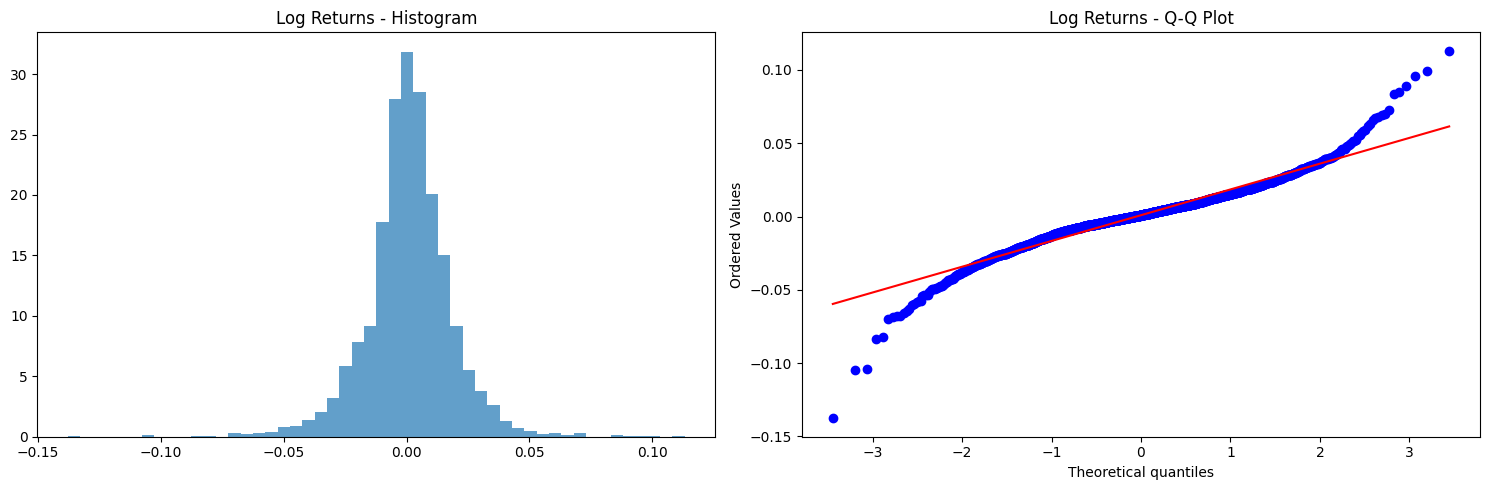

In [17]:
is_normal(data['log_returns'])
plot_distribution(data['log_returns'], 'Log Returns')

Apply Rank based inverse normal transformation to normalized log returns

Test statistic: 0.9999779209701171, p-value: 1.0
Is the distribution Likely Normal? True


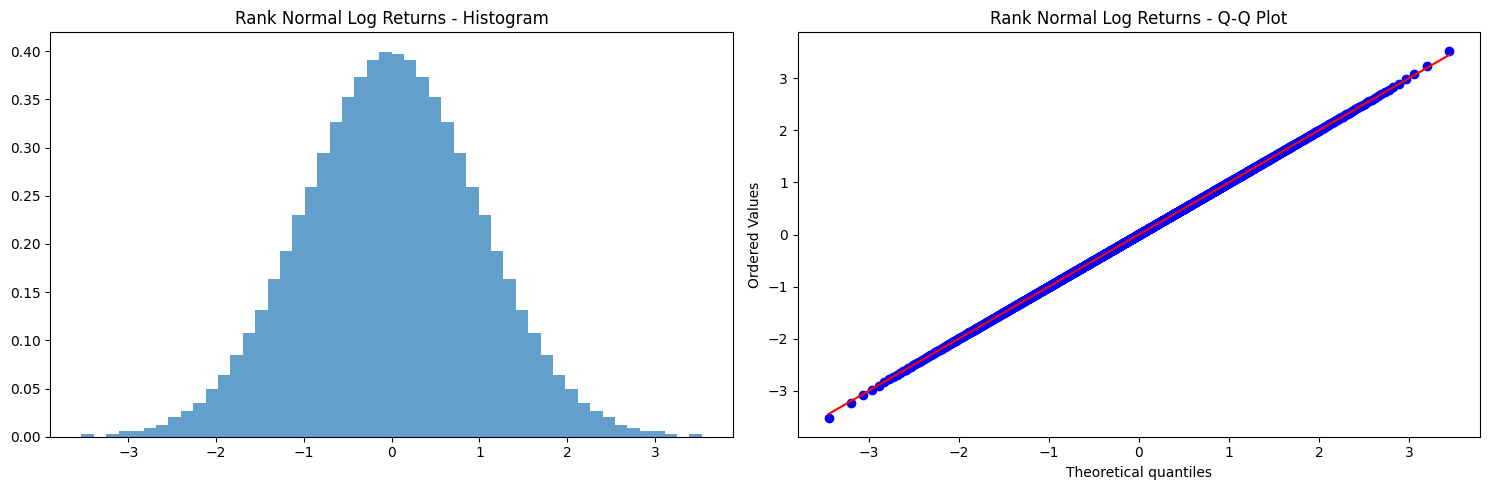

In [16]:
def rank_based_inverse_normal(x):
    return stats.norm.ppf((stats.rankdata(x) - 0.5) / len(x))

data['rank_normal_log_returns'] = rank_based_inverse_normal(data['log_returns'])


is_normal(data['rank_normal_log_returns'])
plot_distribution(data['rank_normal_log_returns'], 'Rank Normal Log Returns')